In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
mpl.rcParams["figure.figsize"] = (4,4)
mpl.rcParams["axes.grid"] = False

In [5]:
dataset = pd.read_csv("train_300k.csv")

## Implementing the Logistic Regression Algorithm from scratch

In [7]:
# Defining the sigmoid function, which is at the heart of logistic regression

def sigmoid(input):
    return 1/(1 + np.exp(-input))

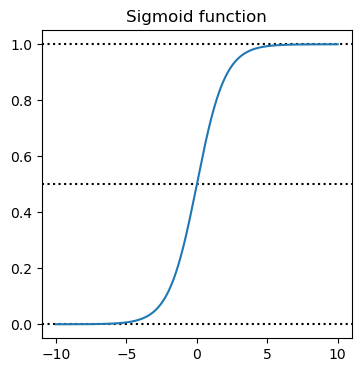

In [23]:
## Plotting the sigmoid function

inputs = np.linspace(-10,10,1000)
outputs = [sigmoid(_) for _ in inputs]
plt.axhline(1, color = "black", linestyle = "dotted")
plt.axhline(0.5, color = "black", linestyle = "dotted")
plt.axhline(0, color = "black", linestyle = "dotted")
plt.plot(inputs, outputs)
plt.title("Sigmoid function")
plt.show()

In [25]:
## Defining a function to compute predictions

def compute_prediction(X_train, weights):
    pred_z = np.dot(X_train, weights)
    pred_prob = sigmoid(pred_z)
    return pred_prob

The formula for cost function of logistic regression is:

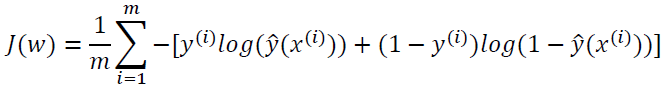

The formula for gradient descent for logistic regression is given below

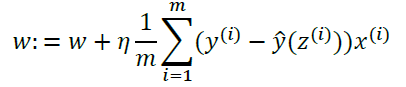

In [36]:
## Defining a function to update the weights using gradient descent formula shown above

def update_weights_gd(X_train, y_train, weights, learning_rate):
    m = y_train.shape[0]
    delta = learning_rate/m * (np.dot(X_train.T, y_train - compute_prediction(X_train, weights)))
    return weights + delta

In [49]:
## Defining a function to compute cost

def compute_cost(X_train, y_train, weights):
    m = y_train.shape[0]
    cost = 1/m * (y_train*np.log(compute_prediction(X_train, weights)) + 
                  (1 - y_train)*np.log(1 - compute_prediction(X_train, weights))
                 )
    return np.sum(cost)*-1

In [82]:
## Defining the function for implementing logistic regression

def train_log_reg(X_train, y_train, learning_rate = 0.1, fit_intercept = True, max_iter = 1000):
    if fit_intercept:
        ones = np.ones(X_train.shape[0])
        X_train = np.c_[ones, X_train]
    weights = np.zeros(X_train.shape[1])
    for n in range(max_iter):
        weights = update_weights_gd(X_train, y_train, weights, learning_rate)
        if n%100 == 0:
            print(f"Cost after {n} iterations is {compute_cost(X_train, y_train, weights):.5f}")
    return weights

In [83]:
## Checking if the logistic regression 

X_train = np.array([[6, 7],[2, 4],[3, 6],[4, 7],[1, 6],[5, 2],[2, 0],[6, 3],[4, 1],[7, 2]])
y_train = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [92]:
weights = train_log_reg(X_train, y_train, max_iter = 100)

Cost after 0 iterations is 0.57440


In [90]:
## Writing a function to return the decision boundary for two dimensional logistic regression function
def dec_bound(weights, x):
    return - ((weights[1]/weights[2])*x + (weights[0]/weights[2]))

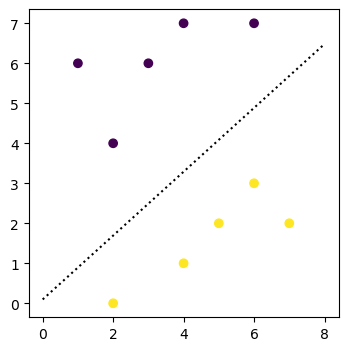

In [91]:
plt.scatter(X_train[:,0], X_train[:,1], c = y_train)
plt.plot(np.linspace(0,8,1000), dec_bound(weights, np.linspace(0,8,1000)), linestyle = "dotted", color = "k")
plt.show()

In [5]:
dataset.columns

Index(['Unnamed: 0', 'id', 'click', 'hour', 'C1', 'banner_pos', 'site_id',
       'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category',
       'device_id', 'device_ip', 'device_model', 'device_type',
       'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
       'C21'],
      dtype='object')

In [6]:
Y = dataset["click"]
X = dataset.drop(['id', 'click', 'hour', 'device_id', 'device_ip'], axis = 1)

In [7]:
## Taking the first 90% of datapoints as training data and the rest of datapoints as testing data

train_size = int(0.9*len(X))
X_train, y_train = X.iloc[:train_size, :], Y.iloc[:train_size]
X_test, y_test = X.iloc[train_size:, :], Y.iloc[train_size:]

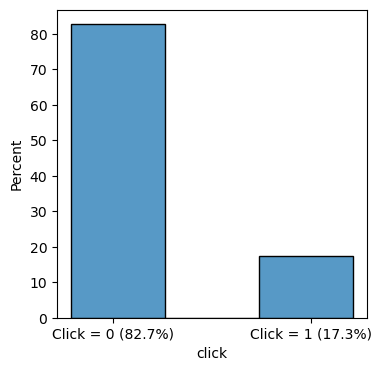

In [8]:
import seaborn as sns
ax = sns.histplot(y_train, bins = 3, stat = "percent")
click_counts = np.unique(y_train, return_counts = True)[1]
ax.set(xticks = [0.15, 0.85], xticklabels = [f"Click = 0 ({click_counts[0]/np.sum(click_counts)*100:.1f}%)", 
                                            f"Click = 1 ({click_counts[1]/np.sum(click_counts)*100:.1f}%)"])
plt.show()

From the above plot, we can see that the classes are imbalanced

In [9]:
## Using One Hot Encoder to transform all the categorical features into binary features

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown= "ignore")
X_train = ohe.fit_transform(X_train)

In [10]:
# One Hot Encoding the test dataset
X_test = ohe.transform(X_test)